In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd
import datetime

import sys
sys.path.insert(1, '../src/')

from SEIR_exams_measures import *


# Read and plot data

In [146]:
df = pd.read_csv ("../data/chillan.csv")
df["Contagiados"] = df.CASO.cumsum()

In [147]:
df

,FechaFormat,CASO,Contagiados
0,2020-03-11,1,1
1,2020-03-13,2,3
2,2020-03-14,2,5
3,2020-03-15,5,10
4,2020-03-16,4,14
5,2020-03-17,12,26
6,2020-03-18,2,28
7,2020-03-19,13,41
8,2020-03-20,9,50
9,2020-03-21,6,56


In [148]:
df["Fecha_dt"] = pd.to_datetime (df["FechaFormat"])
i_data = df["Contagiados"].values
#df = df[df.Contagiados > 50]

In [149]:
df

,FechaFormat,CASO,Contagiados,Fecha_dt
0,2020-03-11,1,1,2020-03-11
1,2020-03-13,2,3,2020-03-13
2,2020-03-14,2,5,2020-03-14
3,2020-03-15,5,10,2020-03-15
4,2020-03-16,4,14,2020-03-16
5,2020-03-17,12,26,2020-03-17
6,2020-03-18,2,28,2020-03-18
7,2020-03-19,13,41,2020-03-19
8,2020-03-20,9,50,2020-03-20
9,2020-03-21,6,56,2020-03-21


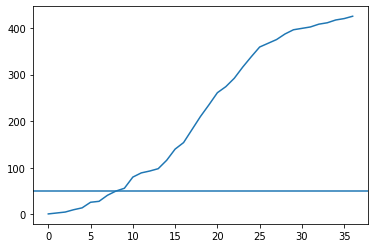

In [150]:
plt.plot(df.Contagiados)
plt.axhline(50)

# Fit pre-50 cases

In [151]:
from SEIR_exams import *

In [152]:
df_pre = df.iloc[:len(df[df.Contagiados <= 50]) + 1]
print (df_pre)

t_pre = np.arange(len(df_pre))
C_pre = df_pre.Contagiados

  FechaFormat  CASO  Contagiados   Fecha_dt
0  2020-03-11     1            1 2020-03-11
1  2020-03-13     2            3 2020-03-13
2  2020-03-14     2            5 2020-03-14
3  2020-03-15     5           10 2020-03-15
4  2020-03-16     4           14 2020-03-16
5  2020-03-17    12           26 2020-03-17
6  2020-03-18     2           28 2020-03-18
7  2020-03-19    13           41 2020-03-19
8  2020-03-20     9           50 2020-03-20
9  2020-03-21     6           56 2020-03-21


In [153]:
pop = 215646

# Ajuste a primeros días
# r0 =   
# e0 =   
# i0 =  

i00 = C_pre[0]
r00 = 0
e00 = 0
s00 = pop - i0 - r0 - e0
c00 = C_pre[0]


In [187]:
RMSE, beta, sigma, gamma, a_date, k, a = GridSearchSEIR_exams (t_pre, s00, e00, i00, r00, c00, c00, C_pre,
                          transmission_coeff = 10**np.arange(-6, -4, .5, dtype = float), # 1 / day person
                          latency_time = np.arange(1., 14., 1.), # days
                          infectious_time = np.arange(1., 30., 1.), # days
                          ks = np.array([1e-2, 1e-1, 1.]),
#                          a_dates = np.array([100]),
#                          a_s = np.array([0.9]))
#                          ks = 10**np.linspace(-2, 0, 5),
                          a_dates = np.linspace (5, 25, 5),
                          a_s = np.linspace(0.2, 1., 8))

beta =  1e-06 50.23375225067139
  min: RMSE =  27.685856574996198 ; b, s, g =  [1e-06, 1.0, 0.034482758620689655] ; a_d, k, a =  [5.0, 0.01, 1.0] ; ( 1.0 ,  29.0 )
beta =  3.162277660168379e-06 49.691946029663086
  min: RMSE =  4.971092097843014 ; b, s, g =  [3.162277660168379e-06, 1.0, 0.04] ; a_d, k, a =  [20.0, 1.0, 0.2] ; ( 1.0 ,  25.0 )
beta =  1e-05 50.015759229660034
  min: RMSE =  4.807425913638766 ; b, s, g =  [1e-05, 0.3333333333333333, 0.5] ; a_d, k, a =  [20.0, 1.0, 0.2] ; ( 3.0 ,  2.0 )
beta =  3.1622776601683795e-05 49.912034034729004
  min: RMSE =  4.807425913638766 ; b, s, g =  [1e-05, 0.3333333333333333, 0.5] ; a_d, k, a =  [20.0, 1.0, 0.2] ; ( 3.0 ,  2.0 )


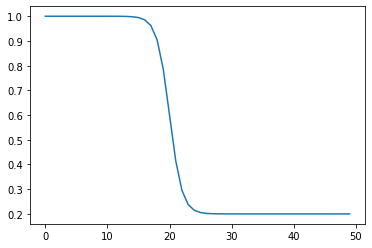

In [188]:
alphas = 1 + (a-1)/(1+np.exp(-k*(np.arange(50) - a_date)))

plt.plot (alphas)

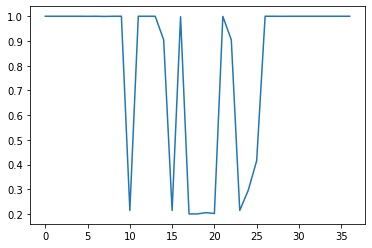

In [189]:

alphas = 1 + (a-1)/(1+np.exp(-k*(df.CASO - a_date)))

plt.plot(alphas)

In [190]:
ts = np.arange (0, 100, 1)

S_c, E_c, I_c, R_c, C_c, C_m = SEIR_exams (ts, s0, e00, i00, r00, c00, c00, beta, sigma, gamma, a_date, k, a)
S_cb, E_cb, I_cb, R_cb, C_cb, C_mb = SEIR_exams_backward (ts, s00, e00, i00, r00, c00, c00, beta, sigma, gamma, a_date, k, a)


In [193]:
i0 = I_cb [len(C_pre)]
r0 = R_cb [len(C_pre)]
e0 = E_cb [len(C_pre)]
s0 = pop - i0 - r0 - e0
c0 = C_cb [len(C_pre)]

print (i0, r0, e0)

135.31125623020446 155.50920728647702 379.06025100607076


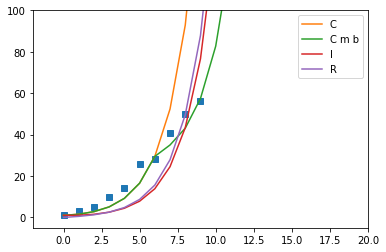

In [192]:

plt.plot(np.arange(len(df_pre.Contagiados)), df_pre.Contagiados, "s")
plt.plot(ts, C_cb, label = "C")
plt.plot(ts, C_mb, label = "C m b")
plt.plot(ts, I_cb, label = "I")
plt.plot(ts, R_cb, label = "R")

plt.xlim(-2, 20)
plt.ylim (-5, 100)
plt.legend()

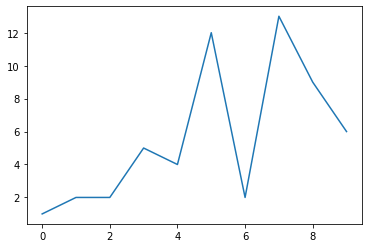

In [180]:
plt.plot (df_pre.CASO)

# Fit post-50 cases

In [261]:
df = df[df.Contagiados > 50]
print (df.index[df.FechaFormat == "2020-03-30"][0])
print (df.FechaFormat.values[18])
print (df)

18
2020-04-08
   FechaFormat  CASO  Contagiados   Fecha_dt
9   2020-03-21     6           56 2020-03-21
10  2020-03-22    24           80 2020-03-22
11  2020-03-23     9           89 2020-03-23
12  2020-03-24     4           93 2020-03-24
13  2020-03-25     5           98 2020-03-25
14  2020-03-26    18          116 2020-03-26
15  2020-03-27    24          140 2020-03-27
16  2020-03-28    14          154 2020-03-28
17  2020-03-29    28          182 2020-03-29
18  2020-03-30    28          210 2020-03-30
19  2020-03-31    25          235 2020-03-31
20  2020-04-01    26          261 2020-04-01
21  2020-04-02    13          274 2020-04-02
22  2020-04-03    18          292 2020-04-03
23  2020-04-04    24          316 2020-04-04
24  2020-04-05    22          338 2020-04-05
25  2020-04-06    21          359 2020-04-06
26  2020-04-07     8          367 2020-04-07
27  2020-04-08     8          375 2020-04-08
28  2020-04-09    12          387 2020-04-09
29  2020-04-10     9          396 2020-04

In [321]:
i_cuar = [df.index[df.FechaFormat == "2020-03-23"][0],
          df.index[df.FechaFormat == "2020-03-30"][0]]
i_cuar = [df.index[df.FechaFormat == "2020-03-30"][0] - df.index[0]]
print (i_cuar)
#i_cuar += 2
#i_cuar = 14

#df = df[i_cuar:]

t_data = np.arange(len(df.Contagiados))
C_real = df.Contagiados.values
print (C_real)


[9]
[ 56  80  89  93  98 116 140 154 182 210 235 261 274 292 316 338 359 367
 375 387 396 399 402 408 411 417 420 425]


0 9
9 28


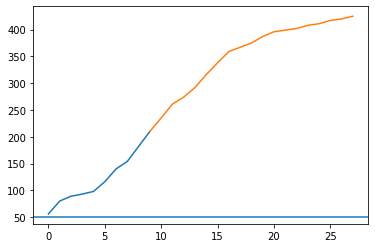

In [322]:
i_ini = 0
for i in range (len(i_cuar) + 1):
    if i == len(i_cuar):
        i_end = len (df)
    else:
        i_end = i_cuar[i]
    print (i_ini, i_end)
    plt.plot(t_data[i_ini:i_end+1], C_real [i_ini:i_end+1])
    i_ini = i_end

plt.axhline(50)

In [323]:
pop = 215646

# Ajuste a primeros días
# r0 =   
# e0 =   
# i0 =  

i0 = I_cb [len(C_pre)]
r0 = R_cb [len(C_pre)]
e0 = E_cb [len(C_pre)]
s0 = pop - i0 - r0 - e0
c0 = C_cb [len(C_pre)]
c0m = C_mb [len(C_pre)]


# Ajuste a primeros días
r0 =  19 
e0 =  22 
i0 =  31

s0 = pop - i0 - r0 - e0
c0 = C_real[0]
c0m = c0

print (i0, r0, e0, c0)

31 19 22 56


In [324]:
4.895477023965976e-07
0.6871168953272974 
0.05555556343557843 
56.08000441355646 
0.09999472332437251 
0.3856258452621279

0.3856258452621279

In [325]:
print (df.FechaFormat.iloc[i_cuar])

18    2020-03-30
Name: FechaFormat, dtype: object


In [327]:
# First scenario: [12.428628768999268, array([4.e-06]), 0.5, 0.16666666666666666, 33.333333333333336, 1.6681005372000592, 0.1] 2.0 6.0
# Second scenario: [7.725913817818546, array([9.e-07]), 1.0, 0.1, 46.66666666666667, 0.0774263682681127, 0.0] 1.0 10.0

min_ = GridSearchSEIR_exams_measures (t_data, s0, e0, i0, r0, c0, c0m, C_real, i_dates_betas = i_cuar,
                                      #transmission_coeffs = [[3e-6], [5e-7, 6e-7, 7e-7]], #, 8e-7, 9e-7, 1e-6]], # 1 / day person                                                              
                                      transmission_coeffs = [[2.5e-6, 5e-6, 1e-5, 2.5e-5 ], [5e-14, 1e-11, 1e-9, 1e-7, 1e-5]], # 1 / day person                                                              
#min_ = GridSearchSEIR_exams_measures (t_data, s0, e0, i0, r0, c0, c0, C_real, i_dates_betas = [],
#                                      transmission_coeffs = [[8e-7, 9e-7, 1e-6, 2e-6, 3e-6, 4e-6, 5e-6, 6e-6, 7e-6]], # 1 / day person                                                              
                                      latency_time = np.arange(1., 7., 1.), # days                                                                                                               
                                      infectious_time = np.arange(6., 18, 2.), # days                                                                                                            
                                      ks = 10**np.linspace(-2, 0, 5),
                                      a_dates = np.linspace (25, 55, 4),
                                      a_s = np.linspace(0., 1., 11), backward = True)


{'b0': [2.5e-06, 5e-06, 1e-05, 2.5e-05], 'b1': [5e-14, 1e-11, 1e-09, 1e-07, 1e-05]}
betas =  [2.5e-06 5.0e-14] 12.54938793182373
  min: RMSE =  6.240614942382201 ; b, s, g =  [array([2.5e-06, 5.0e-14]), 0.2, 0.125] ; a_d, k, a =  [25.0, 1.0, 0.7000000000000001] ; ( 5.0 ,  8.0 )
betas =  [2.5e-06 1.0e-11] 12.375619173049927
  min: RMSE =  6.240614942382201 ; b, s, g =  [array([2.5e-06, 5.0e-14]), 0.2, 0.125] ; a_d, k, a =  [25.0, 1.0, 0.7000000000000001] ; ( 5.0 ,  8.0 )
betas =  [2.5e-06 1.0e-09] 12.397013664245605
  min: RMSE =  6.219504153257485 ; b, s, g =  [array([2.5e-06, 1.0e-09]), 0.2, 0.125] ; a_d, k, a =  [25.0, 1.0, 0.7000000000000001] ; ( 5.0 ,  8.0 )
betas =  [2.5e-06 1.0e-07] 12.347837924957275
  min: RMSE =  6.219504153257485 ; b, s, g =  [array([2.5e-06, 1.0e-09]), 0.2, 0.125] ; a_d, k, a =  [25.0, 1.0, 0.7000000000000001] ; ( 5.0 ,  8.0 )
betas =  [2.5e-06 1.0e-05] 12.553403854370117
  min: RMSE =  6.219504153257485 ; b, s, g =  [array([2.5e-06, 1.0e-09]), 0.2, 0.125] ;

In [328]:
RMSE, betas_g, sigma_g, gamma_g, a_date_g, k_g, a_g = min_
print (min_, 1./sigma_g, 1/gamma_g)
# [21.286217250087976, array([3.e-06, 8.e-07]), 0.5, 0.07142857142857142, 46.66666666666667, 0.01, 0.0] 2.0 14.0


[6.219504153257485, array([2.5e-06, 1.0e-09]), 0.2, 0.125, 25.0, 1.0, 0.7000000000000001] 5.0 8.0


In [329]:
ts = np.arange (0, 100, 1)
i_ini = len(i_data) - len(C_real)
x_plot_data = np.array([df["Fecha_dt"].iloc[0] + datetime.timedelta(days=i) for i in t_data.astype(float)])

x_plot_proy = np.array([df["Fecha_dt"].iloc[0] + datetime.timedelta(days=i) for i in np.arange(len(ts), dtype = float)])

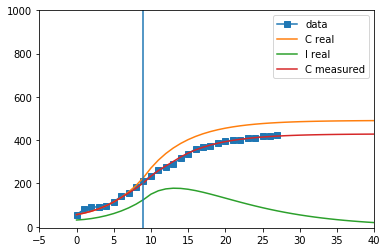

In [330]:

S_c_g, E_c_g, I_c_g, R_c_g, C_c_g, C_m_g = SEIR_exams_measures_backward(ts, s0, e0, i0, r0, c0, c0m, 
                                                            i_cuar, betas_g, sigma_g, gamma_g, 
                                                            a_date_g, k_g, a_g)

plt.plot (t_data, C_real, label = "data", marker = "s")
plt.plot (ts, C_c_g, label = "C real")
plt.plot (ts, I_c_g, label = "I real")
plt.plot (ts, C_m_g, label = "C measured")
plt.axvline (i_cuar)
plt.plot ()
plt.xlim(-5, 40)
plt.ylim(-5, 1000)
plt.legend()


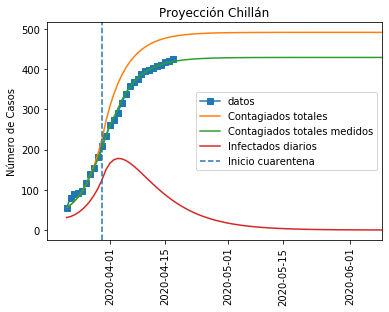

In [336]:
ts = np.arange (0, 100, 1)
S_c_g, E_c_g, I_c_g, R_c_g, C_c_g, C_m_g = SEIR_exams_measures_backward(ts, s0, e0, i0, r0, c0, c0, 
                                                            i_cuar, betas_g, sigma_g, gamma_g, 
                                                            a_date_g, k_g, a_g)

plt.plot (x_plot_data, C_real, label = "datos", marker = "s")
plt.plot (x_plot_proy, C_c_g, label = "Contagiados totales")
plt.plot (x_plot_proy, C_m_g, label = "Contagiados totales medidos")
plt.plot (x_plot_proy, I_c_g, label = "Infectados diarios")
plt.axvline (x_plot_data[i_cuar], ls = "--", label = "Inicio cuarentena")

plt.xlim (xmax = x_plot_proy[80])
plt.xticks(rotation = 90)
plt.ylabel ("Número de Casos")
plt.title ("Proyección Chillán")
plt.legend()

In [337]:
print (np.sqrt(((C_real-C_m_g[:len(C_real)])**2).mean()))

6.219504153257485


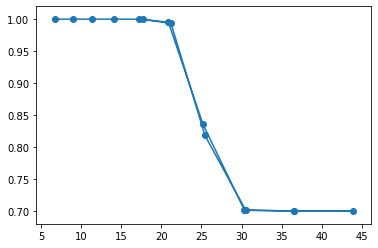

In [338]:
dC_c_g = C_c_g [1:16] - C_c_g[:15]
dC_m_g = C_m_g [1:16] - C_m_g[:15]
a__ = dC_m_g/dC_c_g
alphas = 1 + (a_g-1)/(1+np.exp(-k_g*(dC_c_g-a_date_g)))
plt.plot (dC_c_g, alphas)

plt.scatter (dC_c_g, a__)

Text(0, 0.5, 'Porcentaje de infectados reportados')

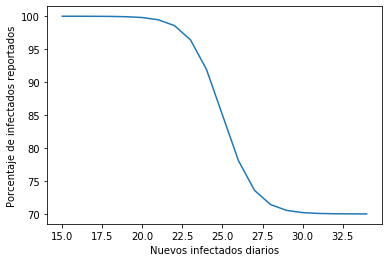

In [407]:
alphas = 1 + (a_g-1)/(1+np.exp(-k_g*(np.arange(15, 35) -a_date_g)))

plt.plot(np.arange(15, 35), alphas*100)
plt.xlabel ("Nuevos infectados diarios")
plt.ylabel ("Porcentaje de infectados reportados")

In [339]:
print(betas_g)
betas_g2 =np.array([betas_g[0], betas_g[1]])

[2.5e-06 1.0e-09]


In [340]:
S_c_g2, E_c_g2, I_c_g2, R_c_g2, C_c_g2, C_m_g2 = SEIR_exams_measures_backward(ts, s0, e0, i0, r0, c0, c0, 
                                                            [i_cuar, 30], betas_g2, sigma_g, gamma_g, 
                                                            a_date_g, k_g, a_g)

NameError: name 'i_dates_beta' is not defined

NameError: name 'C_c_g2' is not defined

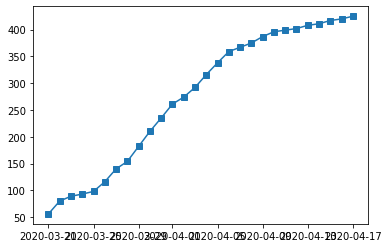

In [341]:
plt.plot (x_plot_data, C_real, label = "data", marker = "s")
plt.plot (x_plot_proy, C_c_g2, label = "C real")
plt.plot (x_plot_proy, C_m_g2, label = "C measured")
plt.plot (x_plot_proy, I_c_g2, label = "I real")
plt.plot ()
plt.xlim (x_plot_proy[0], x_plot_proy[50])
plt.ylim (-5, 1000)
plt.xticks(rotation = 90)
plt.ylabel ("Número de Casos")
plt.title ("Proyección Ñuble")
plt.legend()

# Eliminacion de cuarentena

In [398]:
i_cuar2 = [i_cuar[0], 
          df.index[df.FechaFormat == "2020-04-01"][0] + 23 - df.index[0]]
print (i_cuar2)

[9, 34]


In [399]:
betas_g2 = [betas_g[0], betas_g[1], betas_g[0]]
print (betas_g2)

[2.5e-06, 1e-09, 2.5e-06]


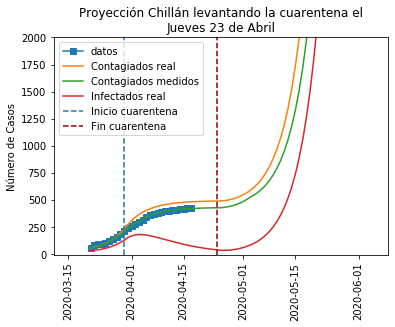

In [417]:

ts = np.arange (0, 200, 1)
i_ini = len(i_data) - len(C_real)
x_plot_data = np.array([df["Fecha_dt"].iloc[0] + datetime.timedelta(days=i) for i in t_data.astype(float)])
x_plot_proy = np.array([df["Fecha_dt"].iloc[0] + datetime.timedelta(days=i) for i in np.arange(len(ts), dtype = float)])

S_c_g, E_c_g, I_c_g, R_c_g, C_c_g, C_m_g = SEIR_exams_measures_backward(ts, s0, e0, i0, r0, c0, c0, 
                                                            i_cuar2, betas_g2, sigma_g, gamma_g, 
                                                            a_date_g, k_g, a_g)

plt.plot (x_plot_data, C_real, label = "datos", marker = "s")
plt.plot (x_plot_proy, C_c_g, label = "Contagiados real")
plt.plot (x_plot_proy, C_m_g, label = "Contagiados medidos")
plt.plot (x_plot_proy, I_c_g, label = "Infectados real")
plt.ylim (-10, 2000)
plt.xlim (xmax = x_plot_proy[80])
plt.xticks(rotation = 90)
plt.axvline (x_plot_proy[i_cuar2[0]], ls = "--", label = "Inicio cuarentena")
plt.axvline (x_plot_proy[i_cuar2[1]], ls = "--", label = "Fin cuarentena", c = "darkred")
plt.ylabel ("Número de Casos")
plt.title ("Proyección Chillán levantando la cuarentena el\nJueves 23 de Abril")
plt.legend()

# Doble Cuarentena

In [390]:
i_cuar3 = [i_cuar[0], # inicio cuar
          df.index[df.FechaFormat == "2020-04-01"][0] + 23 - df.index[0], # fin cuar
          df.index[df.FechaFormat == "2020-04-01"][0] + 23 + 14 - df.index[0], # ini cuar
          df.index[df.FechaFormat == "2020-04-01"][0] + 23 + 14*2 - df.index[0], # fin cuar
          df.index[df.FechaFormat == "2020-04-01"][0] + 23 + 14*3 - df.index[0], # ini cuar
          df.index[df.FechaFormat == "2020-04-01"][0] + 23 + 14*4 - df.index[0]] # fin cuar


In [450]:
i_cuar3 = [i_cuar[0]]
N_cuar = 21
for i in range (10):
    i_cuar3.append(df.index[df.FechaFormat == "2020-04-01"][0] + 23 + N_cuar*i - df.index[0])
i_cuar3

[9, 34, 55, 76, 97, 118, 139, 160, 181, 202, 223]

In [451]:
print(i_cuar3)

[9, 34, 55, 76, 97, 118, 139, 160, 181, 202, 223]


In [452]:
betas_g3 = [betas_g[0], betas_g[1], betas_g[0], betas_g[1], betas_g[0], betas_g[1], betas_g[0]]

betas_g3 = []
for i in range(len(i_cuar3) + 1):
    if i%2 == 0:
        betas_g3.append(betas_g[0])
    else:
        betas_g3.append(betas_g[1])
        
print (betas_g3)

[2.5e-06, 1e-09, 2.5e-06, 1e-09, 2.5e-06, 1e-09, 2.5e-06, 1e-09, 2.5e-06, 1e-09, 2.5e-06, 1e-09]


55
76
97
118
139
160
181
202
223


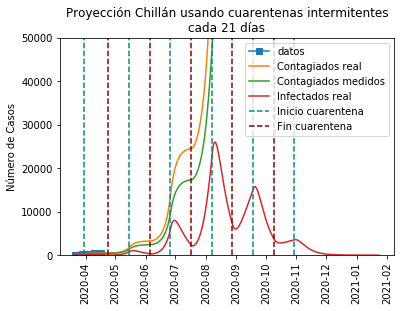

In [454]:

ts = np.arange (0, 310, 1)
x_plot_proy = np.array([df["Fecha_dt"].iloc[0] + datetime.timedelta(days=i) for i in np.arange(len(ts), dtype = float)])

S_c_g, E_c_g, I_c_g, R_c_g, C_c_g, C_m_g = SEIR_exams_measures_backward(ts, s0, e0, i0, r0, c0, c0, 
                                                            i_cuar3, betas_g3, sigma_g, gamma_g, 
                                                            a_date_g, k_g, a_g)
plt.plot (x_plot_data, C_real, label = "datos", marker = "s")
plt.plot (x_plot_proy, C_c_g, label = "Contagiados real")
plt.plot (x_plot_proy, C_m_g, label = "Contagiados medidos")
plt.plot (x_plot_proy, I_c_g, label = "Infectados real")
plt.ylim (-10, 50000)
#plt.xlim (xmax = x_plot_proy[100])
plt.xticks(rotation = 90)
plt.axvline (x_plot_proy[i_cuar3[0]], ls = "--", label = "Inicio cuarentena", c = "darkcyan")
plt.axvline (x_plot_proy[i_cuar3[1]], ls = "--", label = "Fin cuarentena", c = "darkred")
for i in range (2, len(i_cuar3)):
    if (i % 2 == 0):
        plt.axvline (x_plot_proy[i_cuar3[i]], ls = "--", c = "darkcyan")
    else: 
        plt.axvline (x_plot_proy[i_cuar3[i]], ls = "--", c = "darkred")

plt.ylabel ("Número de Casos")
plt.title ("Proyección Chillán usando cuarentenas intermitentes\ncada " + str(N_cuar) + " días")
plt.legend()